In [1]:
# Week 2: Garbage Classification using Transfer Learning
# By: Athulya Syam

#Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os

print("All necessary modules imported successfully.")

All necessary modules imported successfully.


In [2]:
# Dataset source (for ref) Kaggle: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
# This dataset contains 6 garbage classes:
# ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
# GitHub(for ref): https://github.com/dularibhatt/AICTE-Internship/blob/main/P4%20-%20Garbage%20Classification%E2%80%8B%E2%80%8B/Garbage%20Classification%20using%20Transfer%20learning%20code.ipynb

In [3]:
#Step 2: Load and explore dataset

dataset_path = r"C:\Users\USER\Desktop\Athulya\archive\TrashType_Image_Dataset"

classes = os.listdir(dataset_path)
print("Classes:")
print(classes)

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    image_count = len(os.listdir(class_path))
    print(f"{class_name}: {image_count} images")


Classes:
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
cardboard: 403 images
glass: 501 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images


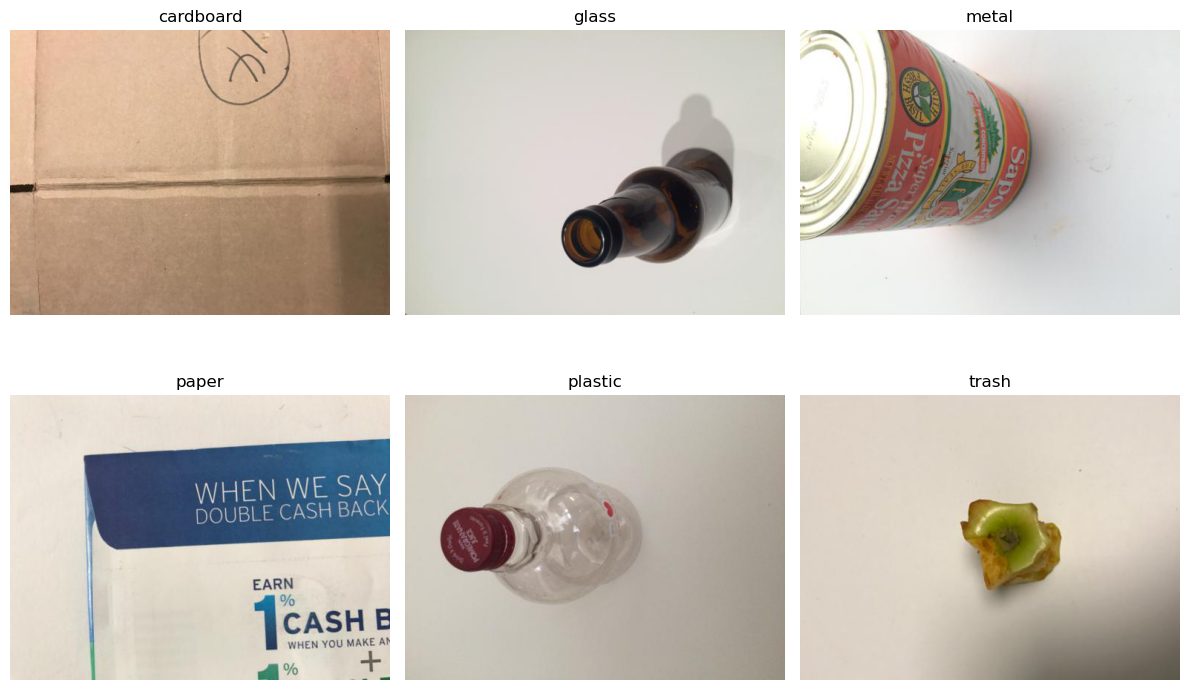

In [4]:
# Showing one image from each class
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_path)
    if not image_files:
        continue
    image_path = os.path.join(class_path, image_files[0])
    img = mpimg.imread(image_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [5]:
#Step 3: Preprocessing and Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [6]:
#Step 4: Model Building

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False 

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
#Step 5: Model Training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


D:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.2519 - loss: 2.0165 - val_accuracy: 0.5746 - val_loss: 1.2155
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.4782 - loss: 1.3252 - val_accuracy: 0.6640 - val_loss: 0.9822
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5821 - loss: 1.1108 - val_accuracy: 0.7018 - val_loss: 0.8692
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.5977 - loss: 1.0340 - val_accuracy: 0.7217 - val_loss: 0.7898
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6454 - loss: 0.9296 - val_accuracy: 0.7475 - val_loss: 0.7567
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6722 - loss: 0.8828 - val_accuracy: 0.7515 - val_loss: 0.7173
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6919 - loss: 0.8048 - val_accuracy: 0.7555 - val_loss: 0.6953
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7176 - loss: 0.7832 - val_accuracy: 0.7416 - val_lo

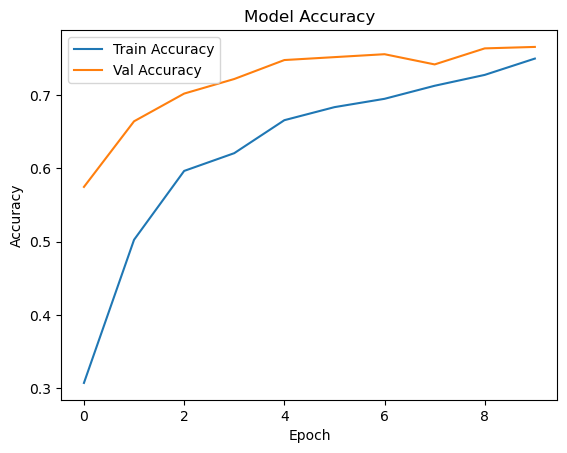

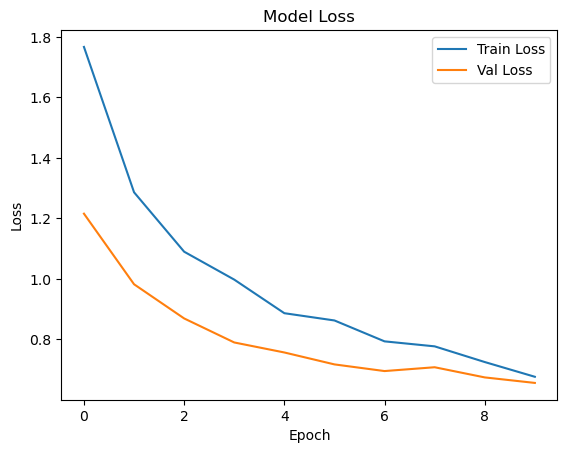

In [8]:
#Step 6: Accuracy and Evaluation graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
pip install gradio


  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/54.3 MB ? eta -:--:--
   - -------------------------------------- 1.8/54.3 MB 11.2 MB/s eta 0:00:05
   --- ------------------------------------ 4.2/54.3 MB 12.0 MB/s eta 0:00:05
   ---- ----------------------------------- 6.6/54.3 MB 11.8 MB/s eta 0:00:05
   ------ --------------------------------- 9.2/54.3 MB 11.9 MB/s eta 0:00:04
   -------- ------------------------------- 11.5/54.3 MB 11.8 MB/s eta 0:00:04
   ---------- ----------------------------- 14.2/54.3 MB 11.9 MB/s eta 0:00:04
   ------------ --------------------------- 16.8/54.3 MB 11.9 MB/s eta 0:00:04
   -------------- ------------------------- 19.1/54.3 MB 11.8 MB/s eta 0:00:03
   ---------------- ----------------------- 21.8/54.3 MB 11.9 MB/s eta 0:00:03
   ----------------- ---------------------- 24.4/54.3 MB 11.8 MB/s eta 0:00:03
   ------------------- -------------------- 27.0/54.3 MB 11.8 MB/s et

In [10]:
import gradio as gr
from tensorflow.keras.preprocessing import image
import numpy as np

labels = list(train_data.class_indices.keys())

def classify_trash(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    return {labels[i]: float(predictions[0][i]) for i in range(len(labels))}

gr.Interface(
    fn=classify_trash,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="Garbage Classifier",
    description="Upload a trash image to classify"
).launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
